In [1]:
import io
import numpy as np
import tensorflow as tf
from PIL import Image
from ipywidgets import FileUpload
from IPython.display import display
from tensorflow.keras.utils import load_img, img_to_array

Load the saved model:

In [2]:
model = tf.keras.models.load_model('indoor-v-outdoor.h5')

The function below processes each selected image and feeds it to the model for prediction.

In [3]:
def test_model(uploader):
    for i in range(len(uploader.value)):
        uploaded_file = uploader.value[i]
        
        img = Image.open(io.BytesIO(uploaded_file.content))
        print(img.format, img.size, img.mode)
        display(img)
        
        img = load_img(io.BytesIO(uploaded_file.content), target_size=(150,150))

        x = img_to_array(img)
        x /= 255
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)

        print('Outdoor scene probability: %', classes[0][0]*100)

        if classes[0]>0.5:
            print(uploader.value[i]['name'] + " is an outdoor scene\n")
        else:
            print(uploader.value[i]['name'] + " is an indoor scene\n")

Run the cell below and select the upload button to choose your own `.jpg` photos.

**Note:** You can select multiple photos for inference at one time.

In [4]:
uploader = FileUpload(accept='*.jpg', multiple=True)
display(uploader)

FileUpload(value=(), accept='*.jpg', description='Upload', multiple=True)

Now run the test function with your chosen photos and see how the model performs!

JPEG (285, 177) RGB


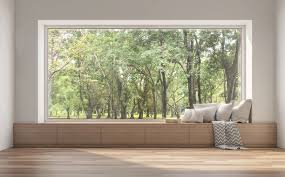

1/1 [==============================] - 0s 47ms/step
Outdoor scene probability: % 0.08658459992147982
looking_out_window_1.jpeg is an indoor scene

JPEG (300, 168) RGB


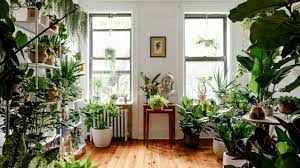

1/1 [==============================] - 0s 46ms/step
Outdoor scene probability: % 0.016060324560385197
indoor.jpeg is an indoor scene

JPEG (275, 183) RGB


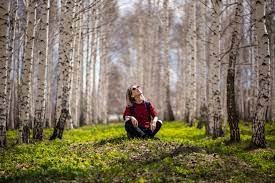

1/1 [==============================] - 0s 45ms/step
Outdoor scene probability: % 99.8181939125061
outside.jpeg is an outdoor scene

JPEG (282, 178) RGB


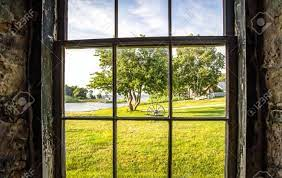

1/1 [==============================] - 0s 46ms/step
Outdoor scene probability: % 0.012157955643488094
looking_out_window_2.jpeg is an indoor scene



In [6]:
test_model(uploader)